### **Connecting Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Fiverr/heart_disease_classification

/content/drive/MyDrive/Fiverr/heart_disease_classification


# **Importing Dependencies**

In [3]:
### For Numerical operations, Plotting and removing warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import warnings

### For Preprocessing and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
from sklearn.preprocessing import StandardScaler

### Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

### Matplotlib and Warning Properties
warnings.filterwarnings('ignore')
%matplotlib inline

# **Loading the Dataset**

In [4]:
header_list = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach",
               "exang", "oldpeak", "slope", "ca", "thal", "target"]



In [5]:
df = pd.read_csv('./processed.cleveland.data', names=header_list,  na_values='?')
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df.head() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


# **Pre-Processing**

In [6]:
# Checking if there are any null values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [7]:
# Dropping records with missing values as they so few
df.dropna(inplace=True)
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# **Exploratory Data Analysis - EDA**

### *Information on Attributes of Data*

In [8]:
df.info() # Printing the information of dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  target    297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB


### *Statistics of Data*

In [9]:
df.describe().T # Describing the data by showing some statistics about it

,count,mean,std,min,25%,50%,75%,max
age,297.0,54.542088,9.049736,29.0,48.0,56.0,61.0,77.0
sex,297.0,0.676768,0.468500,0.0,0.0,1.0,1.0,1.0
cp,297.0,3.158249,0.964859,1.0,3.0,3.0,4.0,4.0
trestbps,297.0,131.693603,17.762806,94.0,120.0,130.0,140.0,200.0
chol,297.0,247.350168,51.997583,126.0,211.0,243.0,276.0,564.0
fbs,297.0,0.144781,0.352474,0.0,0.0,0.0,0.0,1.0
restecg,297.0,0.996633,0.994914,0.0,0.0,1.0,2.0,2.0
thalach,297.0,149.599327,22.941562,71.0,133.0,153.0,166.0,202.0
exang,297.0,0.326599,0.469761,0.0,0.0,0.0,1.0,1.0
oldpeak,297.0,1.055556,1.166123,0.0,0.0,0.8,1.6,6.2


### *Target Class Label Distribution*

In [10]:
# Letss check the total number of instances of each category in our target variable

df.target.value_counts()

0    160
1    137
Name: target, dtype: int64

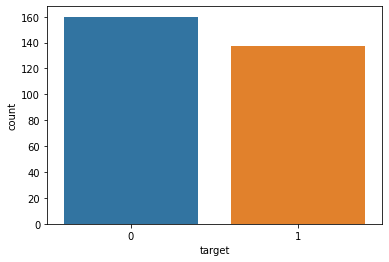

In [11]:
# We can also visualize this using the countplot from seaborn as follows:

sb.countplot(x='target', data=df)
plt.show()

> Data is slightly imbalanced as we do not have 50/50 Split of target class

### *Uni-Variate Analysis*

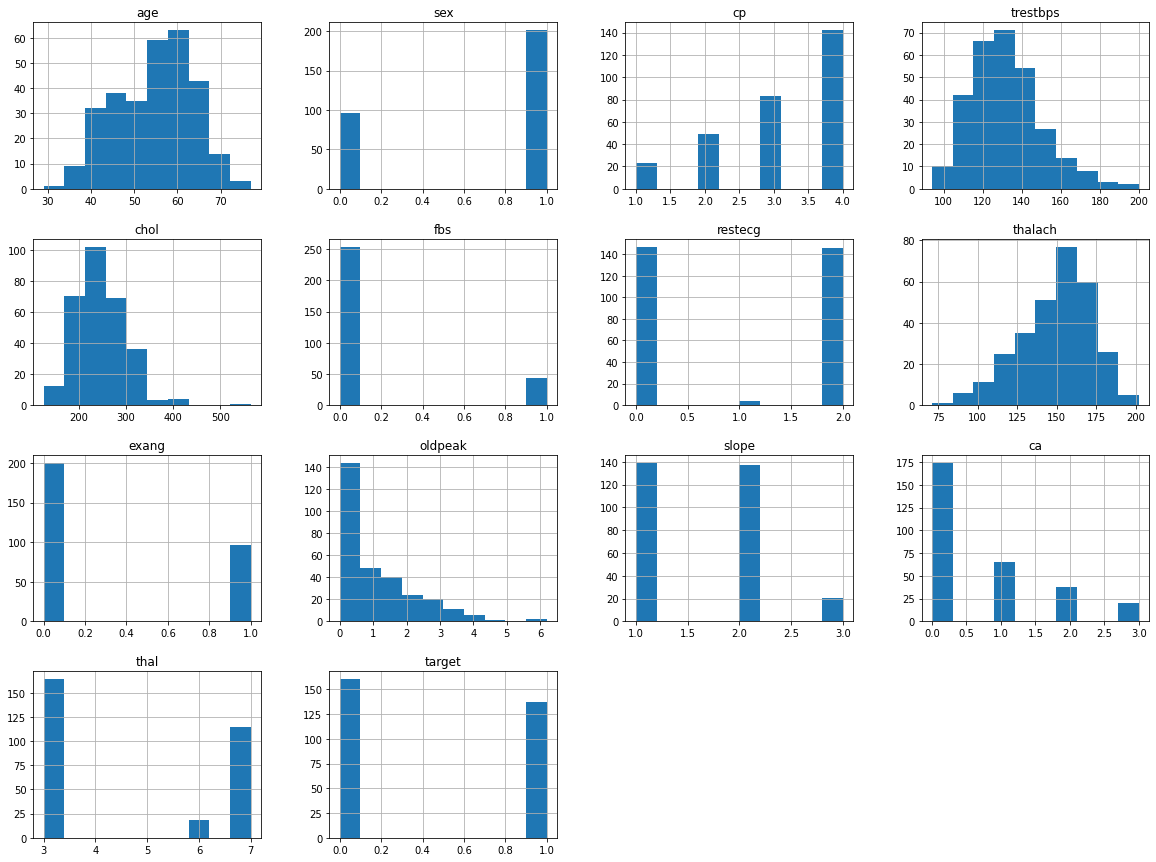

In [12]:
df.hist(figsize=(20, 15))
plt.show()

> from above distributions we see that we have 5 continous features while all the rest are discrete features

In [13]:
# Lets visualize the distribution of continous variables using the histrograms

continous_attributes = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'] # Making a list of continous variables

continous_attributes_df = df[continous_attributes] # Making a seperate dataframe of those variables for visualization
continous_attributes_df.head() # Confirming the creation of dataframe by printing the head of new data

,age,trestbps,chol,thalach,oldpeak
0,63.0,145.0,233.0,150.0,2.3
1,67.0,160.0,286.0,108.0,1.5
2,67.0,120.0,229.0,129.0,2.6
3,37.0,130.0,250.0,187.0,3.5
4,41.0,130.0,204.0,172.0,1.4


### ***Bi-Variate Analysis***

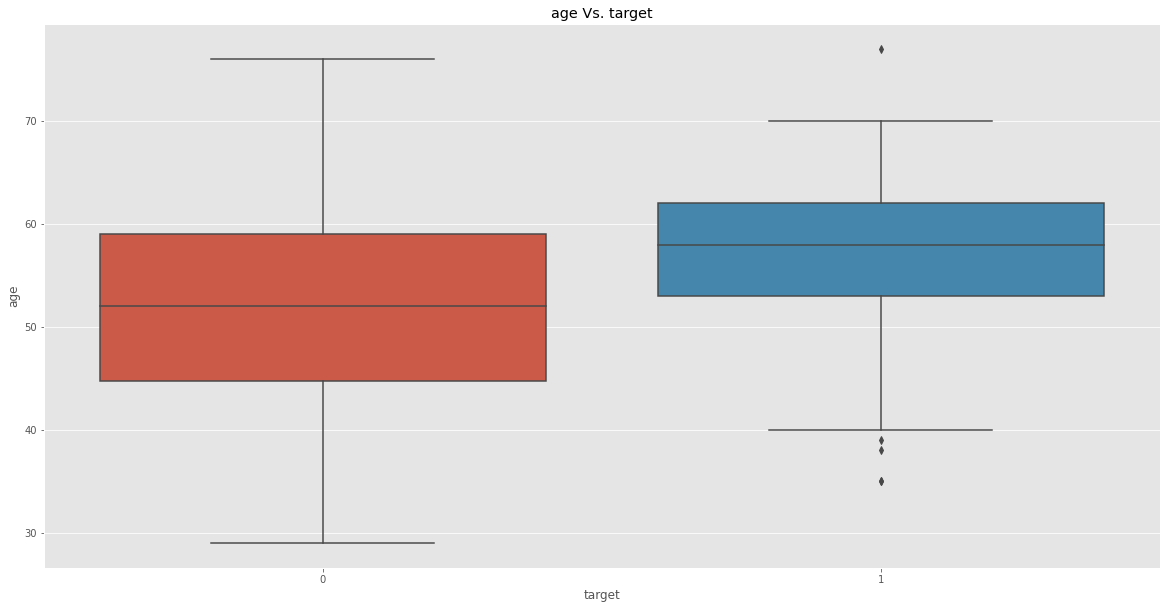

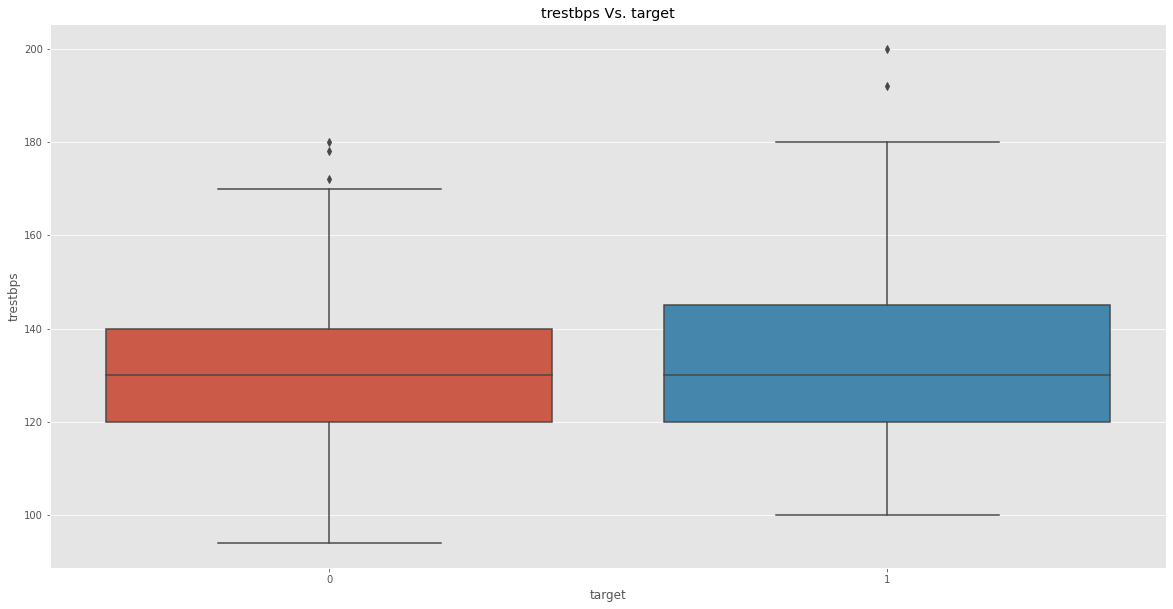

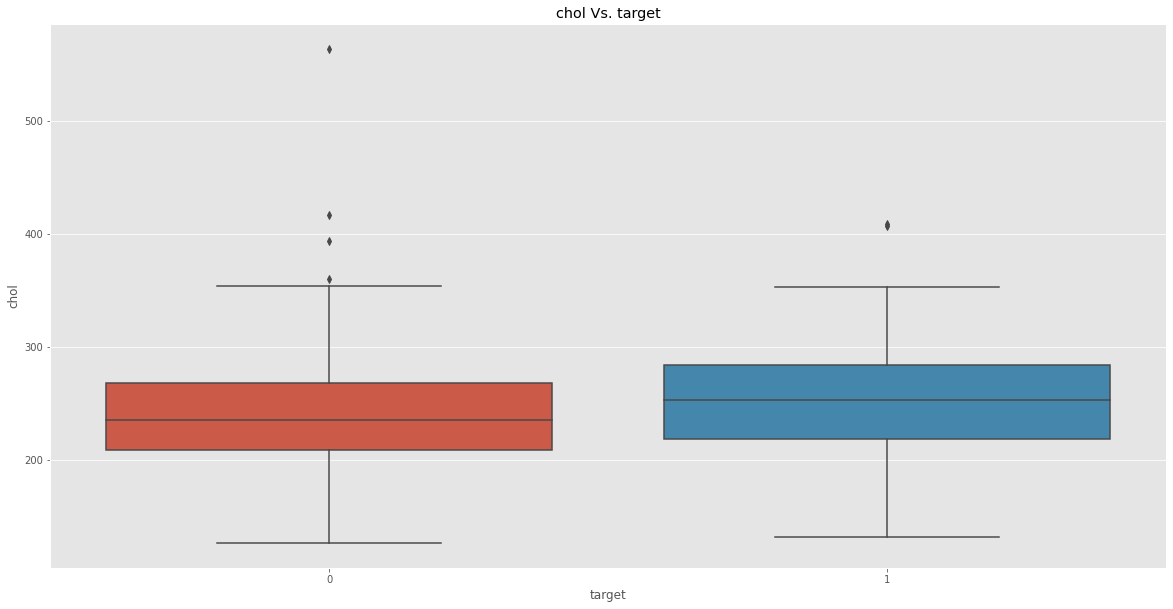

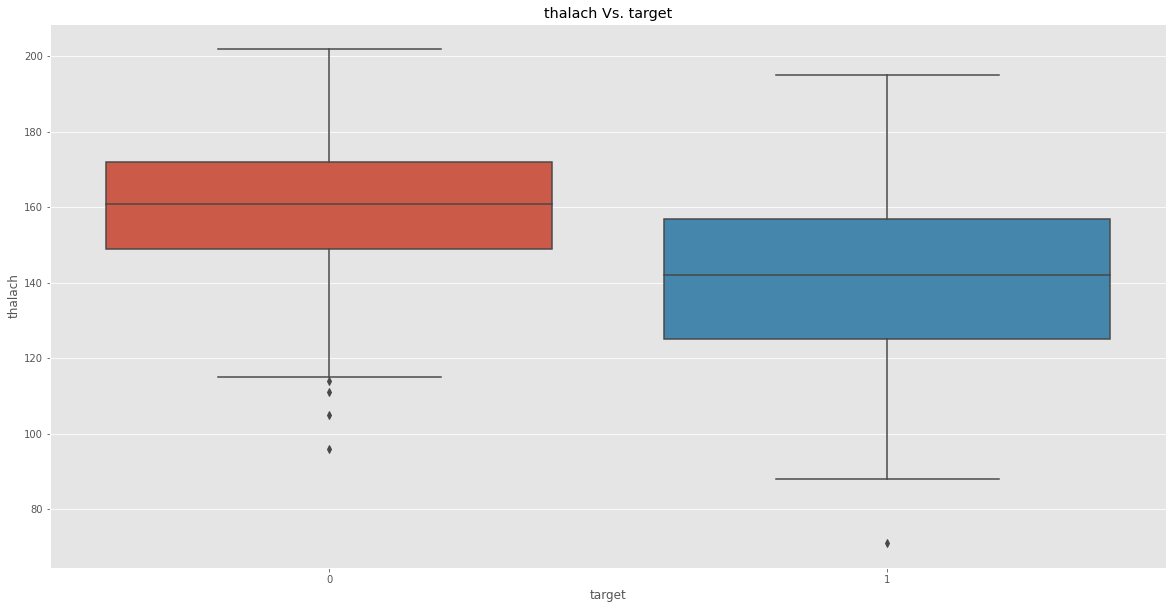

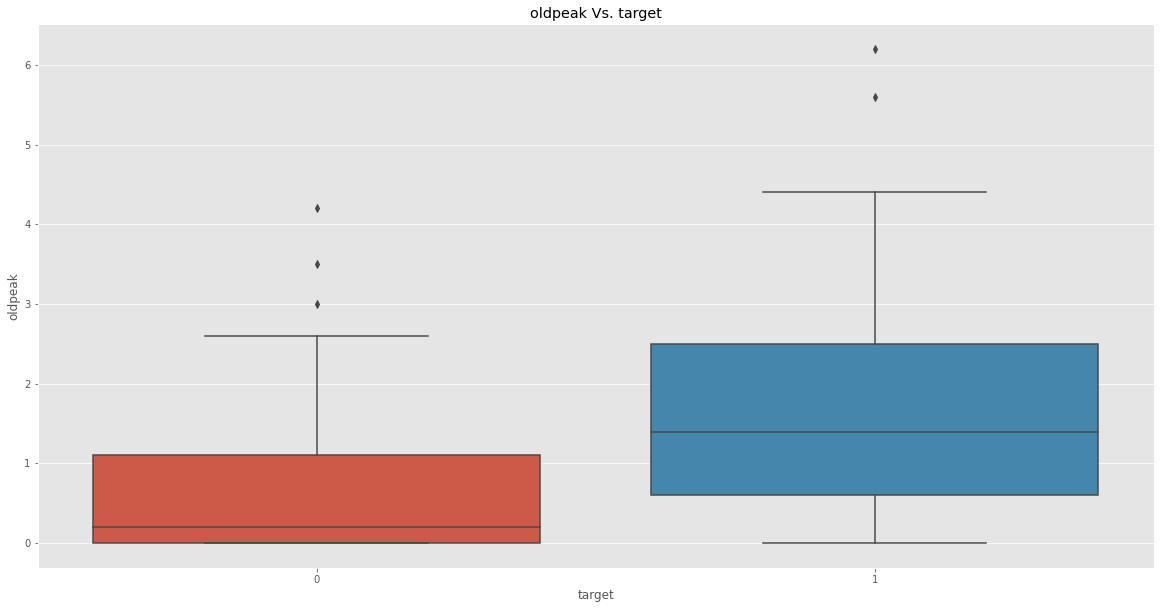

In [14]:
### Lets make the box-plot of each continous feature with the target variable, that is forest type as follows:

plt.style.use('ggplot')
for attribute in continous_attributes:
    plt.figure(figsize=(20, 10))
    plt.title(str(attribute) + " Vs. " + str('target'))
    sb.boxplot(x=df.target, y=continous_attributes_df[attribute])

plt.show()

### ***Tri-Variate Analysis***

In [15]:
# Adding target into continous feature dataframe as we want to set its hue

continous_attributes_df['target']=df['target']
continous_attributes_df.head()

,age,trestbps,chol,thalach,oldpeak,target
0,63.0,145.0,233.0,150.0,2.3,0
1,67.0,160.0,286.0,108.0,1.5,1
2,67.0,120.0,229.0,129.0,2.6,1
3,37.0,130.0,250.0,187.0,3.5,0
4,41.0,130.0,204.0,172.0,1.4,0


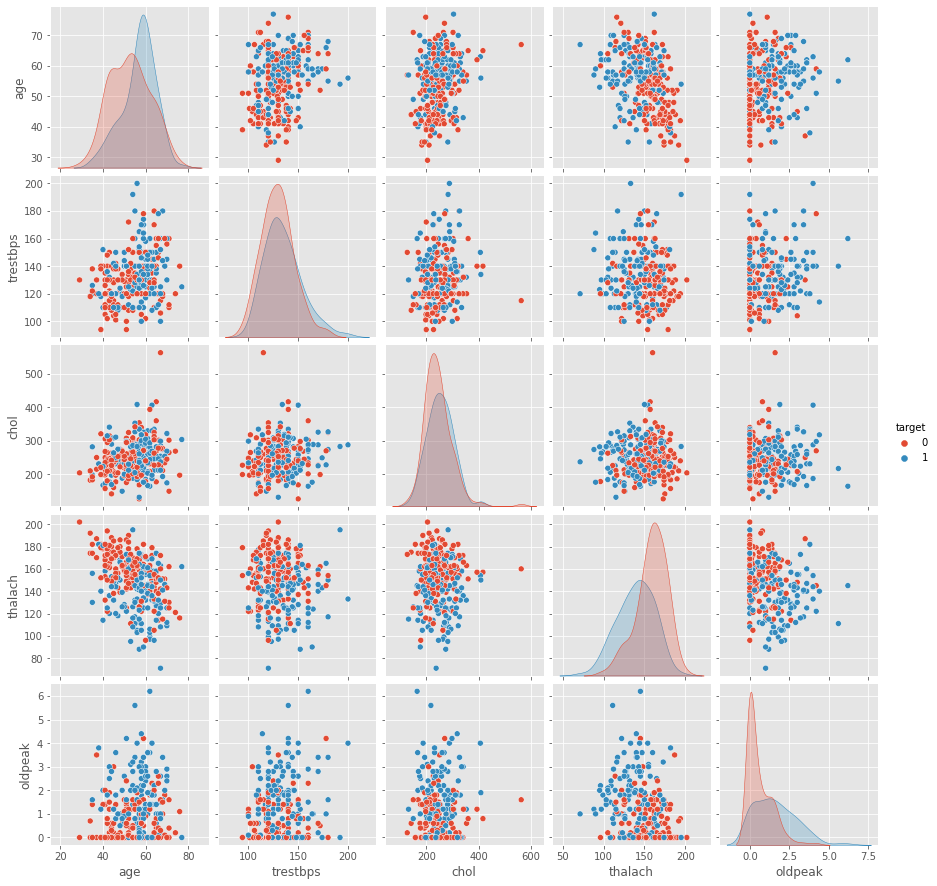

In [16]:
sb.pairplot(continous_attributes_df, hue='target')

# **Correlation Analysis**

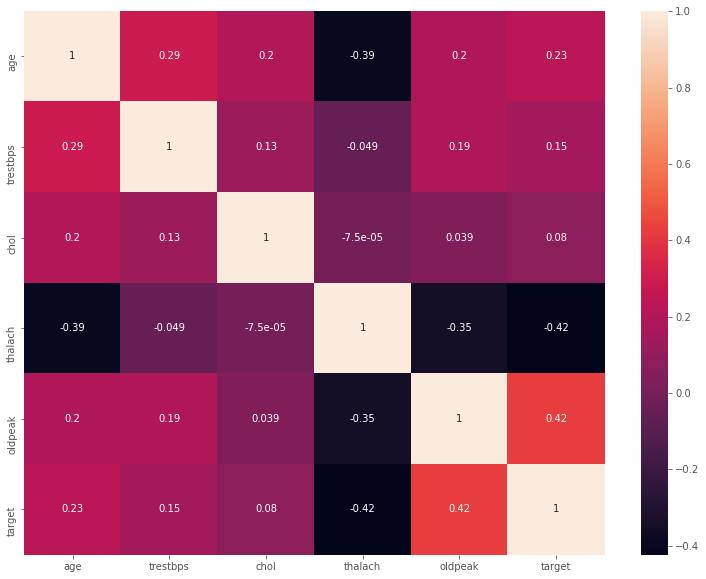

In [17]:
plt.figure(figsize=(13, 10))
corr = continous_attributes_df.corr() # Pearson correlation [-1,1]
sb.heatmap(corr, annot=True) # Make annot=True to see the normalized corr matrix
plt.show()

> We want correlation to be minimum between different columns, if they have correlation greater than 55% then we need to drop one of such column. But right now all correlations are below that threshold

# **Preparing the Data**

In [18]:
y = df["target"] # Separating target variable
X = df.drop('target',axis=1) # Separating features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0) # Splitting the data 

scaler = StandardScaler() # Standardizing the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

> We have separated the target class, features, and splitted the data for training and testing in 80/20 split

# **Machine Learning Models**

### *1- Logistic Regression*

confussion matrix


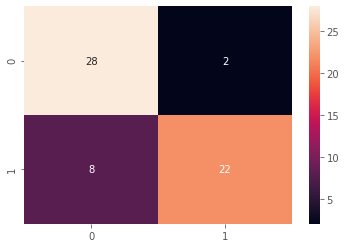



Accuracy of Logistic Regression: 83.33333333333334 

              precision    recall  f1-score   support

           0       0.78      0.93      0.85        30
           1       0.92      0.73      0.81        30

    accuracy                           0.83        60
   macro avg       0.85      0.83      0.83        60
weighted avg       0.85      0.83      0.83        60



In [19]:
m1 = 'Logistic Regression'

lr = LogisticRegression() # intitializing the model

model = lr.fit(X_train, y_train) # training step

lr_predict = lr.predict(X_test) # Predicting

lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")

sb.heatmap(lr_conf_matrix, annot=True) 
plt.show()

print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

> The logistic regression model is giving us the final accuracy of 83% on test set with a support of 60 samples. Having individual accuracy of 78% for class 0 and 92% for class 1

### *2- Random Forest Classfier*

confussion matrix


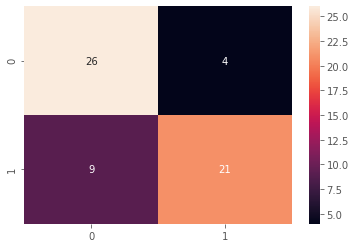



Accuracy of Random Forest: 78.33333333333333 

              precision    recall  f1-score   support

           0       0.74      0.87      0.80        30
           1       0.84      0.70      0.76        30

    accuracy                           0.78        60
   macro avg       0.79      0.78      0.78        60
weighted avg       0.79      0.78      0.78        60



In [20]:
m2 = 'Random Forest Classfier'

rf = RandomForestClassifier(n_estimators=20, random_state=2,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)

rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)

print("confussion matrix")
sb.heatmap(rf_conf_matrix, annot=True) 
plt.show()

print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

> The random forrest classifier model is giving us the final accuracy of 78% on test set with a support of 60 samples. Having individual accuracy of 74% for class 0 and 84% for class 1. These results are poor than logistic regression model

### *3- K-NeighborsClassifier*

confussion matrix


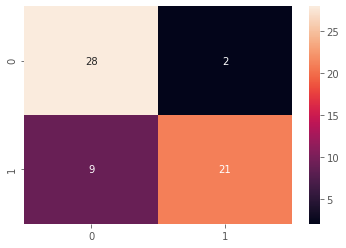



Accuracy of K-NeighborsClassifier: 81.66666666666667 

              precision    recall  f1-score   support

           0       0.76      0.93      0.84        30
           1       0.91      0.70      0.79        30

    accuracy                           0.82        60
   macro avg       0.83      0.82      0.81        60
weighted avg       0.83      0.82      0.81        60



In [21]:
m3 = 'K-NeighborsClassifier'

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)

knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)

print("confussion matrix")
sb.heatmap(knn_conf_matrix, annot=True) 
plt.show()

print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

> The K-Neighbour classifier model is giving us the final accuracy of 82% on test set with a support of 60 samples. Having individual accuracy of 76% for class 0 and 91% for class 1.

### *4- DecisionTreeClassifier*

confussion matrix


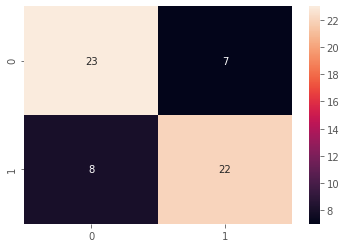



Accuracy of DecisionTreeClassifier: 75.0 

              precision    recall  f1-score   support

           0       0.74      0.77      0.75        30
           1       0.76      0.73      0.75        30

    accuracy                           0.75        60
   macro avg       0.75      0.75      0.75        60
weighted avg       0.75      0.75      0.75        60



In [22]:
m4 = 'DecisionTreeClassifier'

dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)

dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)

print("confussion matrix")
sb.heatmap(dt_conf_matrix, annot=True) 
plt.show()

print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

> The decision tree classifier model is giving us the final accuracy of 75% on test set with a support of 60 samples. Having individual accuracy of 74% for class 0 and 76% for class 1

# **Reciver Operating Characterstic Curve**

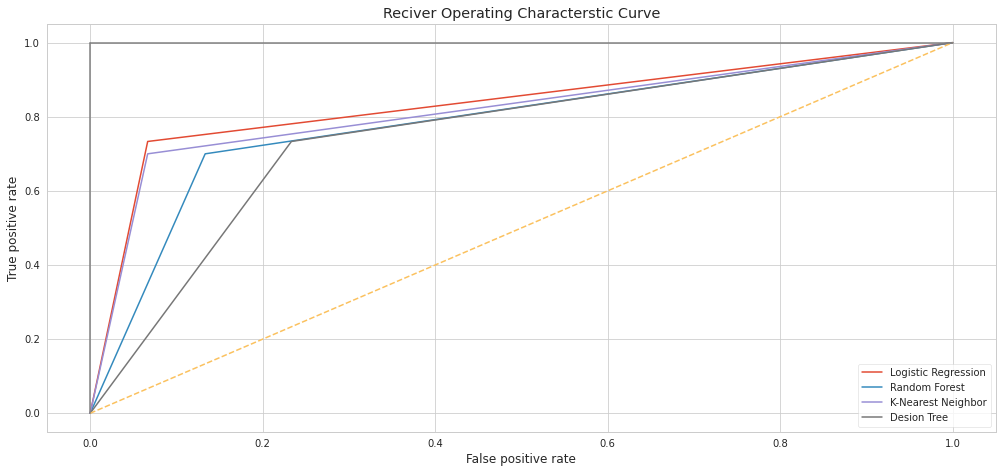

In [23]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted)                                                             
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predicted)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)


sb.set_style('whitegrid')
plt.figure(figsize=(17,7.5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

> As we know for ROC, model having maximum area or its elbow mostly towards upper left, is the best model. From above plot we can see logistic regression (red) is the best model with maximum area

# **Model Evaluation**

In [24]:
model_evaluation = pd.DataFrame({'Model': ['Logistic Regression','Random Forest',
                                           'K-Nearest Neighbour','Decision Tree',], 'Accuracy': [lr_acc_score*100,
                    rf_acc_score*100,knn_acc_score*100,dt_acc_score*100]})
model_evaluation

,Model,Accuracy
0,Logistic Regression,83.333333
1,Random Forest,78.333333
2,K-Nearest Neighbour,81.666667
3,Decision Tree,75.000000


> Simple initialization of Logistic Regression did most well onto this data and we got final accuracy of 83% which for a real life medical scenario is a very good accuracy

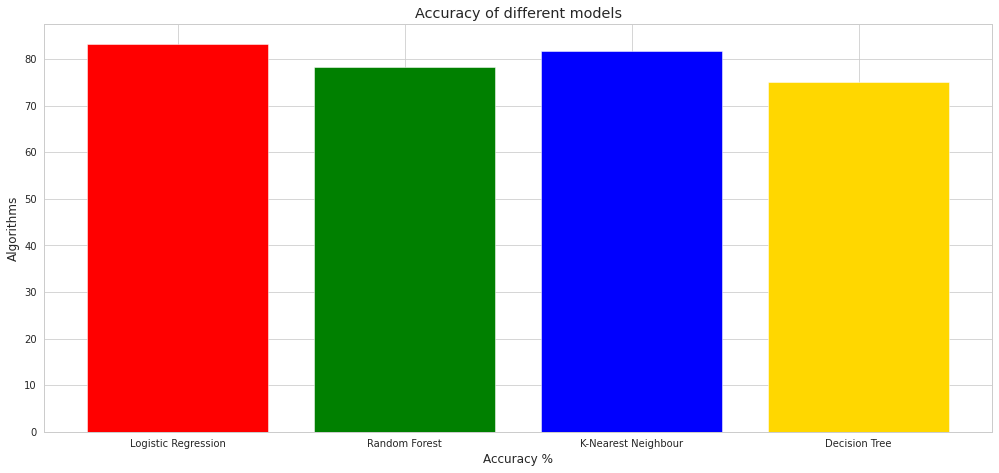

In [25]:
colors = ['red','green','blue','gold',]
plt.figure(figsize=(17,7.5))
plt.title("Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_evaluation['Model'],model_evaluation['Accuracy'],color = colors)
plt.show()